In [1]:
%pylab inline  
import GPy
import GPyOpt

# Create the true and perturbed Forrester function and the boundaries of the problem
f_true= GPyOpt.objective_examples.experiments1d.forrester()          # noisy version
bounds = [{'name': 'var_1', 'type': 'continuous', 'domain': (0,0.9999)}]  # problem constrains 

Populating the interactive namespace from numpy and matplotlib


In [38]:
# Creates GPyOpt object with the model and anquisition fucntion
seed(123)
myBopt_GES = GPyOpt.methods.BayesianOptimization(f=f_true.f,            # function to optimize       
                                             domain=bounds,
                                             verbosity=True)#,        # box-constrains of the problem
                                              #initial_design_numdata = 1) # Selects the Expected improvement

In [3]:
# Creates GPyOpt object with the model and anquisition fucntion
seed(123)
myBopt = GPyOpt.methods.BayesianOptimization(f=f_true.f,            # function to optimize       
                                             domain=bounds,        # box-constrains of the problem
                                             acquisition_type='EI',
                                                                    initial_design_numdata = 1,

                                             exact_feval = True) # Selects the Expected improvement

In [39]:
# Run the optimization GES
max_iter = 10     # evaluation budget
max_time = 10     # time budget 
eps      = 10e-9  # Minimum allows distance between the las two observations

myBopt_GES.run_optimization(max_iter, max_time, eps)  

In [15]:
# Run the optimization EI
max_iter = 10     # evaluation budget
max_time = 10     # time budget 
eps      = 10e-9  # Minimum allows distance between the las two observations
myBopt.run_optimization(max_iter, max_time, eps)

# for i in xrange(1,max_iter):
#     myBopt_GES.run_optimization(max_iter=1)
#     myBopt_GES.plot_acquisition()
#     raw_input("press to continue...")

In [55]:
A = np.reshape( myBopt_GES.x_opt, (1, -1))

In [41]:
B = np.reshape( myBopt_GES.fx_opt, (-1, 1))

In [44]:
myBopt = GPyOpt.methods.BayesianOptimization(f=f_true.f, domain=bounds, X = A, Y = B,  verbosity=True)

In [50]:
myBopt = GPyOpt.methods.BayesianOptimization(f=f_true.f, domain=bounds, verbosity=True)

In [51]:
myBopt.run_optimization(max_iter, max_time, eps)

In [58]:
X = np.array([2,1])

In [62]:
A = np.reshape( X, (-1, 1))

In [64]:
A.size

2

In [54]:
B.shape

(1, 1)

In [46]:
myBopt_GES.X.shape

(15, 1)

In [47]:
myBopt_GES.Y.shape

(15, 1)

In [52]:
myBopt.X

array([[ 0.4933816 ],
       [ 0.07043001],
       [ 0.31015617],
       [ 0.88131385],
       [ 0.42246192],
       [ 0.19689794],
       [ 0.1974127 ],
       [ 0.17024337],
       [ 0.15425774],
       [ 0.14460123],
       [ 0.1364186 ],
       [ 0.14062166],
       [ 0.12608568],
       [ 0.6686619 ],
       [ 0.69382708]])

In [7]:
mean = np.zeros(1000)  # a zero array shaped (1000,)
covariance = np.random.rand(1000, 1000) 
# a matrix of random values shaped (1000,1000)
draw = np.random.multivariate_normal(mean, covariance)

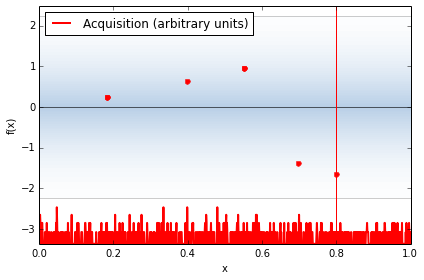

In [10]:
# GES
myBopt_GES.plot_acquisition()

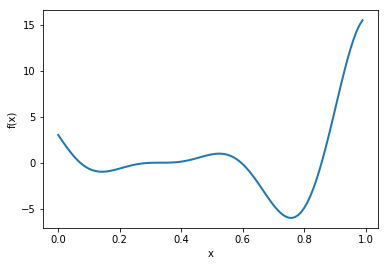

In [8]:
f_true.plot()

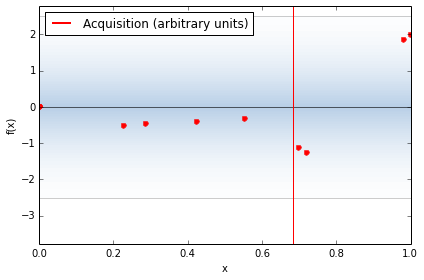

In [8]:
# EI
myBopt.plot_acquisition()

In [8]:
from GPy.kern.src import stationary_cython

In [9]:
print GPy.__version__

1.5.3


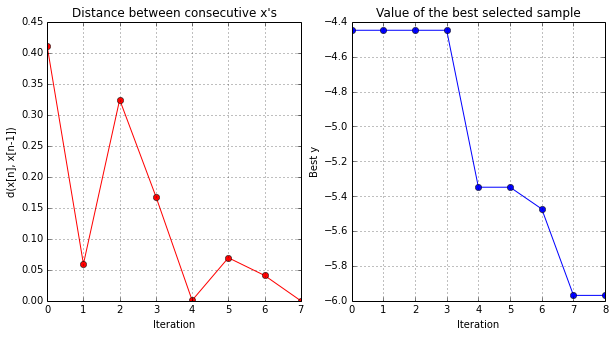

In [35]:
myBopt_GES.plot_convergence()

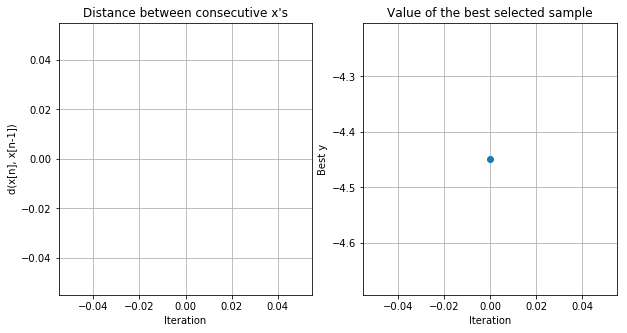

In [9]:
myBopt.plot_convergence()